### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [1]:
from math import pi
from numpy import *
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
from scipy.constants import *
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

# Primer izračuna entropije

In [5]:
P=array([.1, .6, .3])
I=-log2(P)
H=sum(P*I)
H

1.295461844238322

# Entropija binarnega vira

Interval spremenljivke p ne gre čisto od 0 in čisto do 1, ker je informacija za enega od obeh simbolov na teh dveh mejah neskončna, kar predstavlja problem za numerične programe.

Text(0.5, 0, '$p$')

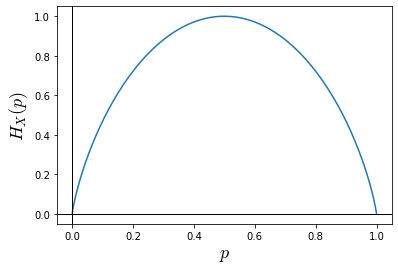

In [9]:
p=linspace(1e-6,1-1e-6,1000)
H=-p*log2(p)-(1-p)*log2(1-p)

#Risanje    
fig1, ax1 = plt.subplots()
ax1.plot(p,H)
ax1.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax1.set_ylabel(r'$H_X(p)$', fontsize = 18)
ax1.set_xlabel(r'$p$', fontsize = 18)


# Izhodišča za dokaz maksimalne entropije

$\ln \left( x \right) \leqslant x - 1$   ;   $x > 0$

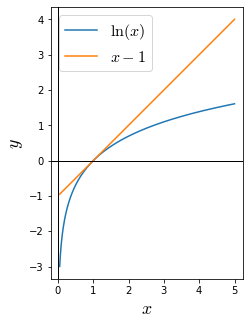

In [43]:
x=linspace(0.05,5,1000)
y1=log(x)
y2=x-1

#Risanje    
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(x,y1,label='$\ln(x)$')
ax1.plot(x,y2,label='$x-1$')
ax1.legend(fontsize = 16)
ax1.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax1.set_ylabel(r'$y$', fontsize = 18)
ax1.set_xlabel(r'$x$', fontsize = 18)
ax1.set_aspect('equal', adjustable='box')

# Preizkus trditve: ${H_Y} \leqslant \sum\limits_{i = 1}^L {{P_Y}\left( {{y_i}} \right)\ln \left( {\frac{1}{{{P_X}\left( {{x_i}} \right)}}} \right)} $

In [80]:
L=5
P1=ones(L)/L
P2=cumsum(P1)
P2=P2/sum(P2)
P3=array([1,5,3,5,2])
P3=P3/sum(P3)
P4=array([1,5,50,100,1000])
P4=P4/sum(P4)

H1 = -sum(P1*log2(P1))
P1logP2 =  -sum(P1*log2(P2))
P1logP3 =  -sum(P1*log2(P3))
P1logP4 =  -sum(P1*log2(P4))

H2 = -sum(P2*log2(P2))
P2logP1 =  -sum(P2*log2(P1))
P2logP3 =  -sum(P2*log2(P3))
P2logP4 =  -sum(P2*log2(P4))

H3 = -sum(P3*log2(P3))
P3logP1 =  -sum(P3*log2(P1))
P3logP2 =  -sum(P3*log2(P2))
P3logP4 =  -sum(P3*log2(P4))

H4 = -sum(P4*log2(P4))
P4logP1 =  -sum(P4*log2(P1))
P4logP2 =  -sum(P4*log2(P2))
P4logP3 =  -sum(P4*log2(P3))

display(P1)
display(P2)
display(P3)
display(P4)
display('H1={:.4}, P1log(P2)={:.4}, P1log(P3)={:.4}, P1log(P4)={:.4}'.format(H1,P1logP2,P1logP3,P1logP4))
display('H2={:.4}, P2log(P1)={:.4}, P2log(P3)={:.4}, P2log(P4)={:.4}'.format(H2,P2logP1,P2logP3,P2logP4))
display('H3={:.4}, P3log(P1)={:.4}, P3log(P2)={:.4}, P3log(P4)={:.4}'.format(H3,P3logP1,P3logP2,P3logP4))
display('H4={:.4}, P4log(P1)={:.4}, P4log(P2)={:.4}, P4log(P3)={:.4}'.format(H4,P4logP1,P4logP2,P4logP3))


array([0.2, 0.2, 0.2, 0.2, 0.2])

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

array([0.0625, 0.3125, 0.1875, 0.3125, 0.125 ])

array([0.00086505, 0.00432526, 0.0432526 , 0.08650519, 0.8650519 ])

'H1=2.322, P1log(P2)=2.526, P1log(P3)=2.554, P1log(P4)=5.26'

'H2=2.149, P2log(P1)=2.322, P2log(P3)=2.421, P2log(P4)=3.643'

'H3=2.127, P3log(P1)=2.322, P3log(P2)=2.382, P3log(P4)=5.069'

'H4=0.7251, P4log(P1)=2.322, P4log(P2)=1.652, P4log(P3)=2.855'